<a href="https://colab.research.google.com/github/Muhammadsulton1/ML/blob/main/nlp_gen_algorithm%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install deap

In [ ]:
# Подавление предупреждений
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('train.csv')

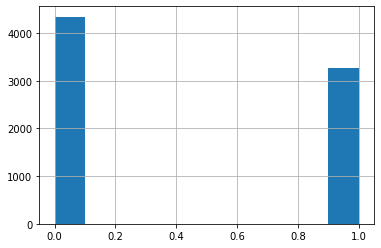

In [ ]:
data['target'].hist();

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
print(len(data['text']))

7613


In [ ]:
data.describe(include= 'object')

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


можем увидеть что уникальных значений у нас 7503 а в общем текста 7613 получаетсяч что мы имеем повторения в наших данных поэтому мы удалим дубликаты

In [ ]:
data = data.drop_duplicates(subset=['text'])

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7503 non-null   int64 
 1   keyword   7447 non-null   object
 2   location  5021 non-null   object
 3   text      7503 non-null   object
 4   target    7503 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 351.7+ KB
None


In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(15)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
location,2482,33.1
keyword,56,0.7


т.к. много пропущенных данных, то целесообразно будет их удалить и столбец keyword не будет нести информации для нашего случая

In [ ]:
data = data.drop(['location','keyword','id'],axis = 1)

In [ ]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import re

In [ ]:
#применим функцию к нижниму регистру
def capitalizer(string: str) -> str:
    return string.lower()
# Применить функцию
data['text'] = [capitalizer(string) for string in data['text']]

In [ ]:
#поменяем точки в тексте на ничего
def change_point(x):
  return x.replace('.','')
data['text'] = [change_point(string) for string in data['text']]

In [ ]:
#поменяем запятые в тексте на ничего
def change_coma(x):
  return x.replace(',','')
data['text'] = [change_point(string) for string in data['text']]

In [ ]:
def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

In [ ]:
def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

In [ ]:
def remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

In [ ]:
def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
def remove_numbers(s, keep=None):
    if keep:
        keep = set(str(x) for x in keep)
        return re.sub(r'\b\d+\b', lambda m: m.group() if m.group() in keep else '', s)
    else:
        # Shortcircuit the use of a set if there is no sequence to keep
        return re.sub(r'\b\d+\b', '', s)

In [ ]:
from itertools import groupby
def remove(s,keep=None):
  if keep:
    keep = set(str(x) for x in keep)
    return keep #[''.join(j) for i,j in groupby (data['text_clean'][7607], key=lambda x:x[0].isdigit())]

#print([''.join(j) for i,j in groupby (data['text_clean'][7607], key=lambda x:x[0].isdigit())])

In [ ]:
import unicodedata
data['text_clean'] = data['text'].apply(lambda x: remove_emails(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_urls(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_rt(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_special_chars(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_accented_chars(x))
data['text_clean'] = data['text_clean'].apply(lambda s: remove_numbers(s))

In [ ]:
data.tail(30)

,text,target,text_clean
7578,@jt_ruff23 @cameronhacker and i wrecked you both,0,jt_ruff23 cameronhacker and i wrecked you both
7579,three days off from work and they've pretty mu...,0,three days off from work and theyve pretty muc...
7580,#fx #forex #trading cramer: iger's 3 words tha...,0,fx forex trading cramer igers words that wrec...
7581,@engineshed great atmosphere at the british li...,0,engineshed great atmosphere at the british lio...
7582,cramer: iger's 3 words that wrecked disney's s...,0,cramer igers words that wrecked disneys stock...
7583,pic of 16yr old pkk suicide bomber who detonat...,1,pic of 16yr old pkk suicide bomber who detonat...
7584,these boxes are ready to explode! exploding ki...,0,these boxes are ready to explode exploding kit...
7585,calgary police flood road closures in calgary ...,1,calgary police flood road closures in calgary ...
7586,#sismo detectado #japì_n 15:41:07 seismic inte...,1,sismo detectado japi_n seismic intensity iwa...
7587,sirens everywhere!,0,sirens everywhere


In [ ]:
#УДАЛИТЬ ПРОБЕЛЫ
data['text_clean'] = [string.strip() for string in data['text_clean']]

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#токенизация текста
data = data.assign(text_tokenize = data['text_clean'].apply(word_tokenize))

In [ ]:
data.head()

,text,target,text_clean,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


In [ ]:
#удаление стоп слов
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
data.head()

,text,target,text_clean,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
#лемитизация слов
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [lemmatizer.lemmatize(y, pos='v') for y in x])

In [ ]:
data.head()

,text,target,text_clean,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[residents, ask, shelter, place, notify, offic..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,"[get, send, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
#стемминг 
import nltk
from nltk.stem import SnowballStemmer

In [ ]:
snowball = SnowballStemmer("english")

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [snowball.stem(y) for y in x])

In [ ]:
data

,text,target,text_clean,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, rong, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[peopl, receiv, wildfir, evacu, order, califor..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,"[get, send, photo, rubi, alaska, smoke, wildfi..."
...,...,...,...,...
7604,#worldnews fallen powerlines on g:link tram: u...,1,worldnews fallen powerlines on glink tram upda...,"[worldnew, fall, powerlin, glink, tram, updat,..."
7605,on the flip side i'm at walmart and there is a...,1,on the flip side im at walmart and there is a ...,"[flip, side, im, walmart, bomb, everyon, evacu..."
7606,suicide bomber kills 15 in saudi security site...,1,suicide bomber kills in saudi security site m...,"[suicid, bomber, kill, saudi, secur, site, mos..."
7608,two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...,"[two, giant, crane, hold, bridg, collaps, near..."


In [ ]:
data = data.assign(text_str = data['text_tokenize'].apply(str))

In [ ]:
data.head()

,text,target,text_clean,text_tokenize,text_str
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,"[deed, reason, earthquak, may, allah, forgiv, us]","['deed', 'reason', 'earthquak', 'may', 'allah'..."
1,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, rong, sask, canada]","['forest', 'fire', 'near', 'la', 'rong', 'sask..."
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[resid, ask, shelter, place, notifi, offic, ev...","['resid', 'ask', 'shelter', 'place', 'notifi',..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,"[peopl, receiv, wildfir, evacu, order, califor...","['peopl', 'receiv', 'wildfir', 'evacu', 'order..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,"[get, send, photo, rubi, alaska, smoke, wildfi...","['get', 'send', 'photo', 'rubi', 'alaska', 'sm..."


In [ ]:
data = data.drop(['text','text_clean','text_tokenize'],axis=1)

In [ ]:
data.shape

(7503, 2)

In [ ]:
df = data.copy()

In [ ]:
#выбираем 'text_str' потому что он очищеный приведен к начальной форме удалены стоп слова проведена лексимизация текста итп 
X = data['text_str']
y = data['target']

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
# подгоняем модель под векторизацию
vectorizer.fit(X)
# преобразуем нашу разряженную матрицу 
X = vectorizer.transform(X)
print('размер разряженной матрицы: ', X.shape)
print('количество ненулевых вхождений: ', X.nnz)

размер разряженной матрицы:  (7503, 19148)
количество ненулевых вхождений:  70817


In [ ]:
X = X.toarray()
feature_names = vectorizer.get_feature_names()
X=pd.DataFrame(X, columns = feature_names)
#features = X.columns
#X = X.values

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
import random

from pandas import read_csv

from sklearn.model_selection import KFold 
from sklearn.naive_bayes import BernoulliNB
SEED = 2018
np.random.seed(SEED)


In [ ]:
import random

from pandas import read_csv

from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB


class Gen:
    NUM_FOLDS = 5

    def __init__(self, X, y, randomSeed):

        self.randomSeed = randomSeed

        self.X = X
        self.y = y

        self.kfold = KFold(n_splits=self.NUM_FOLDS)

        self.classifier = BernoulliNB()

    def __len__(self):

        return self.X.shape[1]

    def getMeanAccuracy(self, zeroOneList):
        
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis=1)

        cv_results = model_selection.cross_val_score(self.classifier, currentX, self.y, cv=self.kfold, scoring='accuracy')

        return cv_results.mean()


def main():
    gen = Gen(X, y, randomSeed=42)

    allOnes = [1] * len(gen)
    print("-- All features selected: ", allOnes, ", accuracy = ", gen.getMeanAccuracy(allOnes))


if __name__ == "__main__":
    main()

-- All features selected:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
model_selection.cross_val_score(BernoulliNB(), X, y, cv=5, scoring='accuracy').mean()

0.7322489895625138

gen	nevals	max     	avg     
0  	50    	-8.70302	-8.85975
1  	46    	-8.67089	-8.81438
2  	46    	-8.68189	-8.77137
3  	46    	-8.64075	-8.74901
4  	48    	-8.64328	-8.71618
5  	46    	-8.62862	-8.68258
6  	48    	-8.60968	-8.66528
7  	46    	-8.59128	-8.65096
8  	47    	-8.59128	-8.63353
9  	50    	-8.55735	-8.62022
10 	47    	-8.55902	-8.60565
11 	48    	-8.55268	-8.59222
12 	48    	-8.54868	-8.58081
13 	48    	-8.52455	-8.57086
14 	45    	-8.50074	-8.56099
15 	43    	-8.49681	-8.545  
16 	46    	-8.49681	-8.52869
17 	49    	-8.48028	-8.51691
18 	46    	-8.46001	-8.50944
19 	47    	-8.46001	-8.50058
20 	48    	-8.45642	-8.49078
21 	47    	-8.45735	-8.48408
22 	45    	-8.43775	-8.47469
23 	48    	-8.42895	-8.46577
24 	47    	-8.42895	-8.45484
25 	44    	-8.41961	-8.44624
26 	47    	-8.40848	-8.43656
27 	46    	-8.40188	-8.43054
28 	47    	-8.40188	-8.42617
29 	46    	-8.39188	-8.41755
30 	37    	-8.39228	-8.41231
31 	48    	-8.39228	-8.40601
32 	50    	-8.39161	-8.40245
33 	44    	-8.

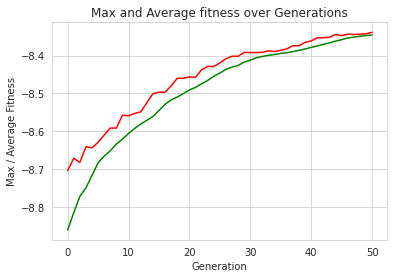

In [ ]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

from deap import base, algorithms

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9 
P_MUTATION = 0.2
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 5

FEATURE_PENALTY_FACTOR = 0.001

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

gen = Gen(X, y, RANDOM_SEED)

toolbox = base.Toolbox()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("zeroOrOne", random.randint, 0, 1)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(gen))

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


def genClassificationAccuracy(individual):
    numFeaturesUsed = sum(individual)
    if numFeaturesUsed == 0:
        return 0.0,
    else:
        accuracy = gen.getMeanAccuracy(individual)
        return accuracy - FEATURE_PENALTY_FACTOR * numFeaturesUsed,  # return a tuple


toolbox.register("evaluate", genClassificationAccuracy)

toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(gen))


def main():

    population = toolbox.populationCreator(n=POPULATION_SIZE)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i], ", fitness = ", hof.items[i].fitness.values[0],
              ", accuracy = ", gen.getMeanAccuracy(hof.items[i]), ", features = ", sum(hof.items[i]))

    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()